In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [2]:

def comprehensive_analysis(df):
    # 1. Basic statistics and missing values
    print("Basic Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

    # 2. Correlation analysis
    corr_matrix = df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # 3. Identify highly correlated features
    high_corr = np.where(np.abs(corr_matrix) > 0.8)
    high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
    print("\nHighly correlated feature pairs:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.2f}")

    # 4. Variance Inflation Factor (VIF) for multicollinearity
    X = add_constant(df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVariance Inflation Factors:")
    print(vif_data.sort_values('VIF', ascending=False))

    # 5. PCA for dimensionality assessment
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance_ratio)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Cumulative Explained Variance')
    plt.tight_layout()
    plt.show()

    # 6. Scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.tight_layout()
    plt.show()

    # 7. Outlier detection using multiple methods
    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outliers_iso = iso_forest.fit_predict(scaled_data)
    
    # Elliptic Envelope
    ee = EllipticEnvelope(contamination=0.1, random_state=42)
    outliers_ee = ee.fit_predict(scaled_data)
    
    # Z-score
    z_scores = np.abs(stats.zscore(df))
    outliers_z = np.where(z_scores > 3)
    
    print(f"\nNumber of potential outliers (Isolation Forest): {sum(outliers_iso == -1)}")
    print(f"Number of potential outliers (Elliptic Envelope): {sum(outliers_ee == -1)}")
    print(f"Number of potential outliers (Z-score > 3): {len(outliers_z[0])}")

    # 8. Skewness and Kurtosis analysis
    skewness = df.skew()
    kurtosis = df.kurtosis()
    print("\nSkewness of features:")
    print(skewness)
    print("\nKurtosis of features:")
    print(kurtosis)

    # 9. Feature-to-feature relationships (sample for efficiency)
    sample_df = df.sample(min(1000, len(df)))
    sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.2})
    plt.tight_layout()
    plt.show()

    # 10. Noise-to-Signal Ratio (approximation using PCA)
    total_variance = np.sum(pca.explained_variance_)
    noise_variance = np.sum(pca.explained_variance_[int(0.95 * len(pca.explained_variance_)):])
    nsr = noise_variance / (total_variance - noise_variance)
    print(f"\nApproximate Noise-to-Signal Ratio: {nsr:.4f}")



To interpret the results:

Multicollinearity:

Look for high correlations in the heatmap and the list of highly correlated pairs.
Check VIF values. VIF > 5 suggests moderate multicollinearity, while VIF > 10 indicates severe multicollinearity.
In the PCA results, if a small number of components explain most of the variance, it suggests high multicollinearity.


Noisiness:

Check the number of outliers detected by different methods. A high number of outliers might indicate noisy data.
Look for features with high skewness or kurtosis, which might indicate noise or the need for transformation.
In the PCA results, if many components are needed to explain most of the variance, it might indicate noisy data.
A high Noise-to-Signal Ratio suggests noisier data.


Overall data quality:

Examine the pairplots for unexpected patterns or inconsistencies.
Check if the cumulative explained variance in PCA reaches a high level (e.g., 95%) with a reasonable number of components.



This comprehensive analysis will give you a thorough understanding of the multicollinearity and noisiness in your high-dimensional financial dataset. Based on the results, you can make informed decisions about feature selection, dimensionality reduction, or data transformation techniques to address any issues identified. C

Analysis of Df_mice:
Basic Statistics:
         Unnamed: 0  Liquidity_and_Coverage_Ratios_PC1  \
count  20125.000000                       2.012500e+04   
mean   10062.000000                      -4.519228e-17   
std     5809.731419                       1.787012e+00   
min        0.000000                      -7.841332e+00   
25%     5031.000000                      -6.208395e-01   
50%    10062.000000                      -3.530034e-01   
75%    15093.000000                       1.324803e-01   
max    20124.000000                       1.193724e+02   

       Liquidity_and_Coverage_Ratios_PC2  Leverage_Ratios_PC1  \
count                       2.012500e+04         2.012500e+04   
mean                       -1.059194e-17        -1.129807e-17   
std                         1.000021e+00         1.140464e+00   
min                        -7.799666e+00        -2.633598e+01   
25%                        -1.485416e-02        -3.732928e-01   
50%                        -8.511489e-03        

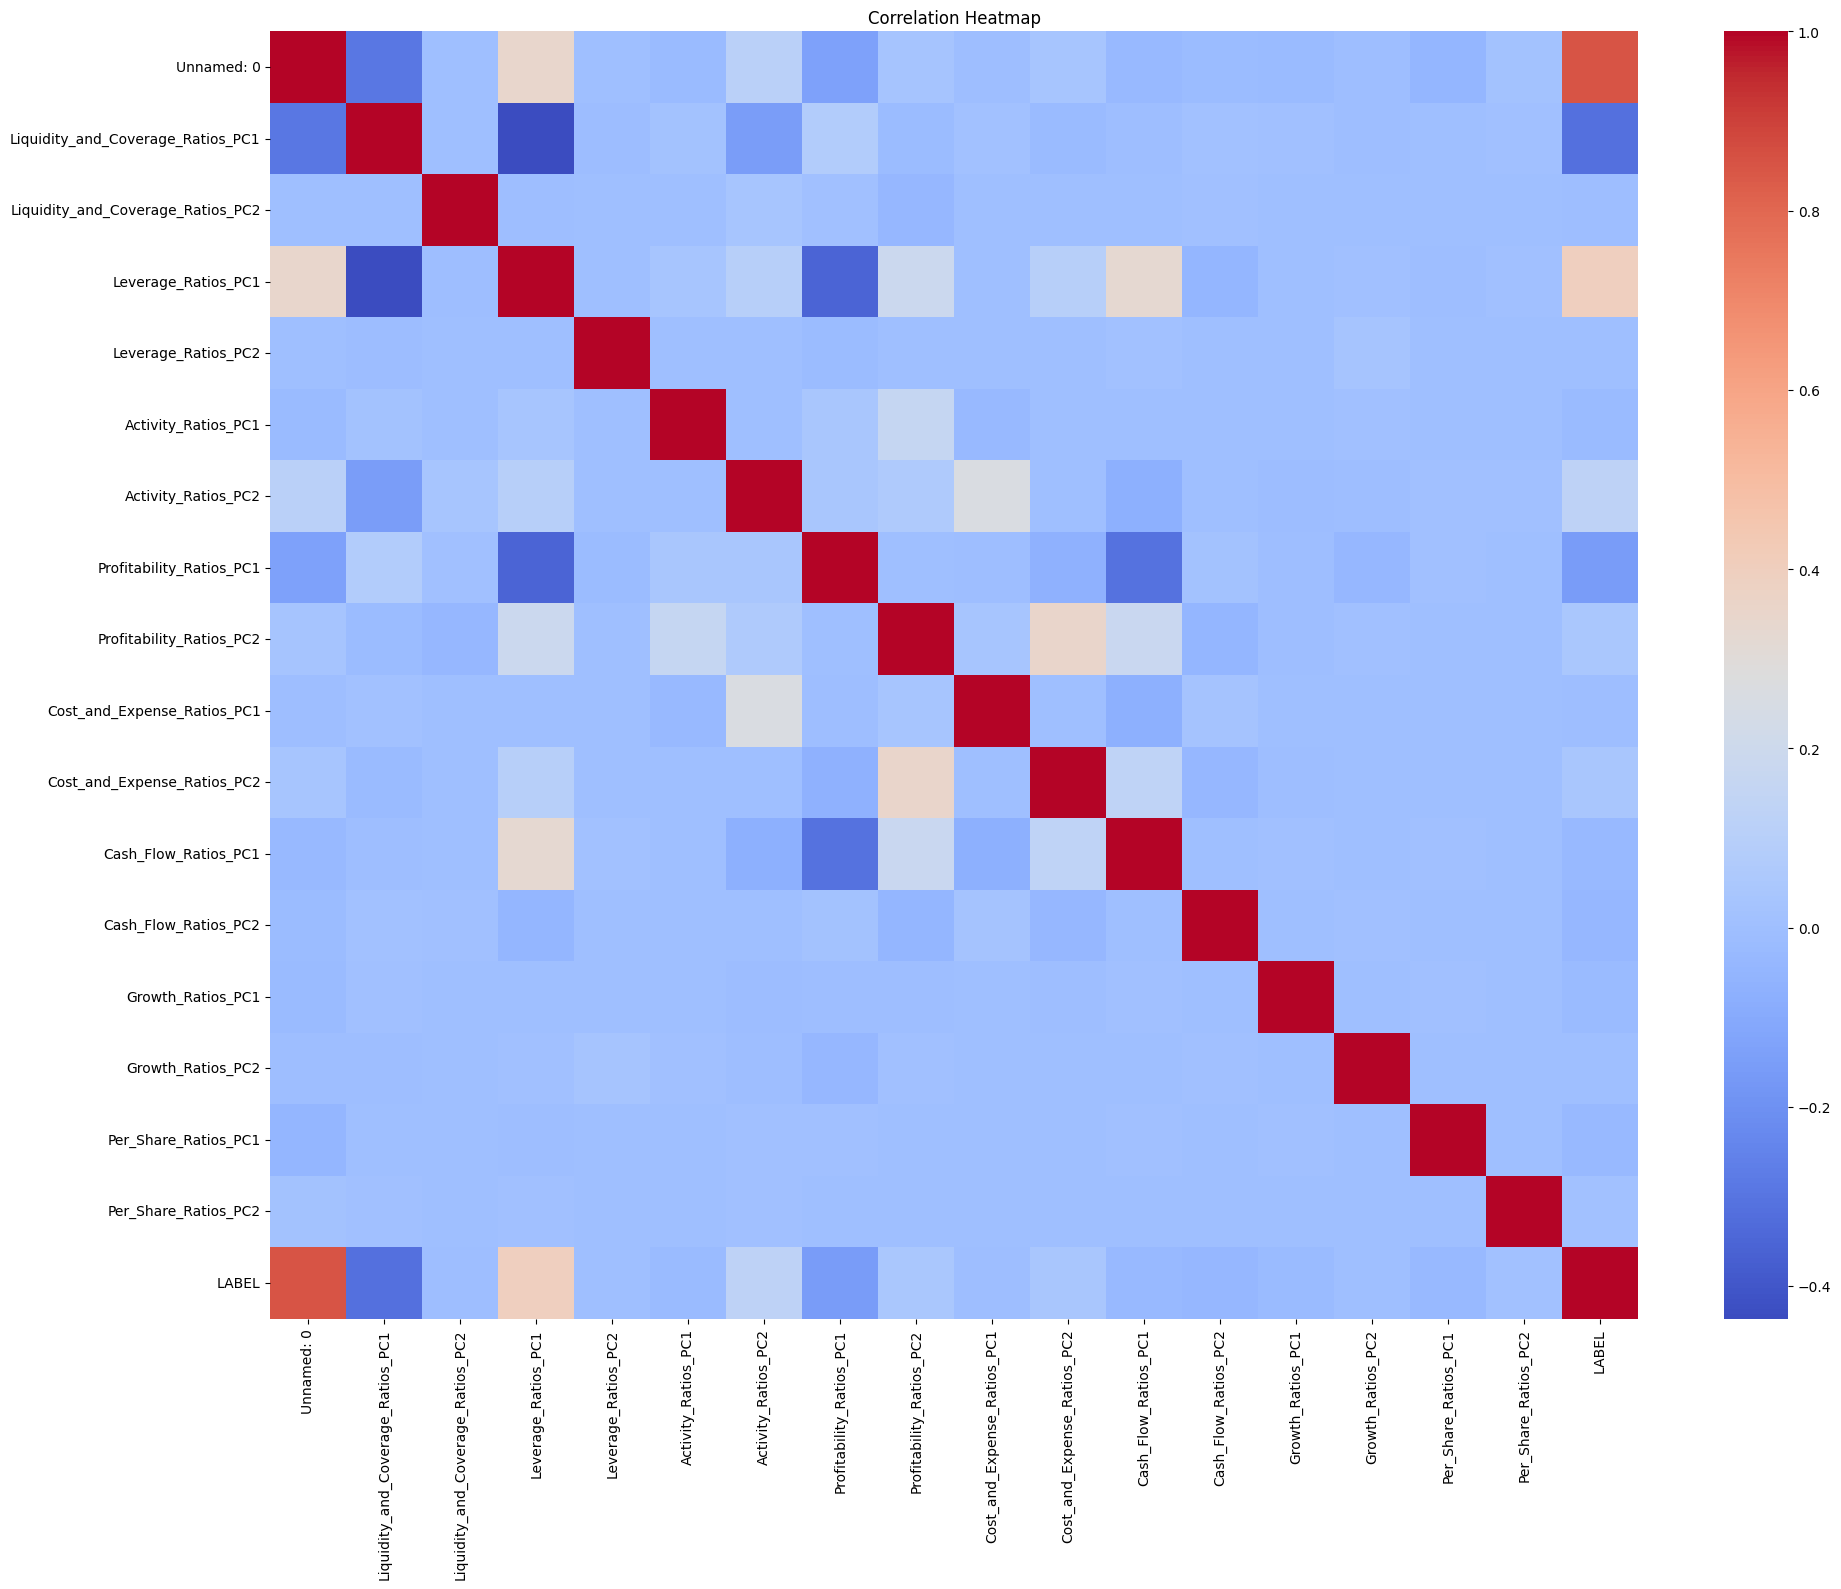


Highly correlated feature pairs:
Unnamed: 0 - LABEL: 0.85

Variance Inflation Factors:
                              feature       VIF
0                               const  5.201196
18                              LABEL  3.911864
1                          Unnamed: 0  3.709760
4                 Leverage_Ratios_PC1  1.754381
2   Liquidity_and_Coverage_Ratios_PC1  1.327540
12               Cash_Flow_Ratios_PC1  1.280179
9            Profitability_Ratios_PC2  1.246659
8            Profitability_Ratios_PC1  1.235338
11        Cost_and_Expense_Ratios_PC2  1.154909
7                 Activity_Ratios_PC2  1.127904
10        Cost_and_Expense_Ratios_PC1  1.087557
6                 Activity_Ratios_PC1  1.036868
13               Cash_Flow_Ratios_PC2  1.007364
3   Liquidity_and_Coverage_Ratios_PC2  1.003643
15                  Growth_Ratios_PC2  1.002928
16               Per_Share_Ratios_PC1  1.002398
5                 Leverage_Ratios_PC2  1.001355
14                  Growth_Ratios_PC1  1.000891


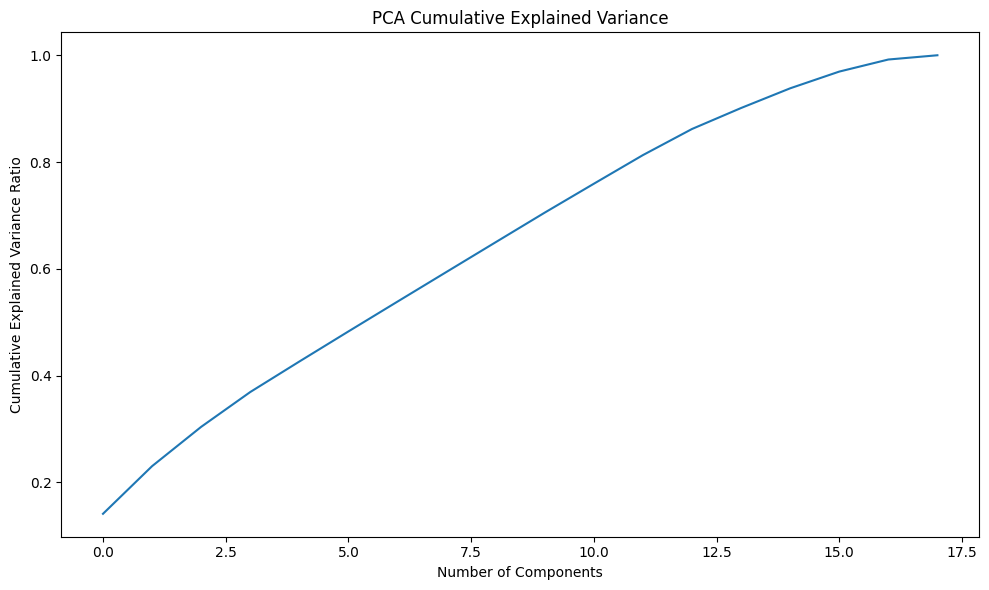

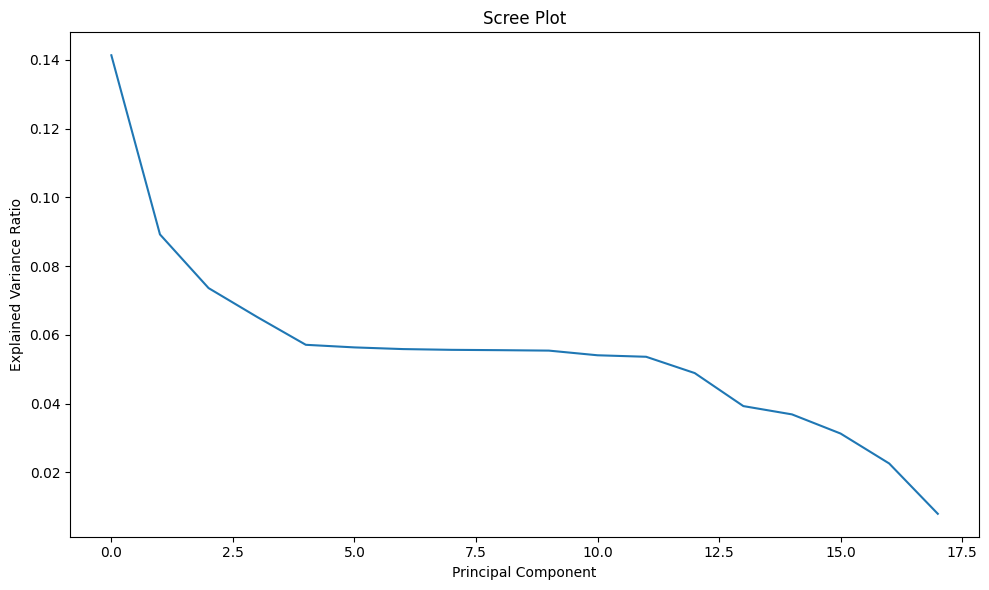


Number of potential outliers (Isolation Forest): 2013
Number of potential outliers (Elliptic Envelope): 2013
Number of potential outliers (Z-score > 3): 1461

Skewness of features:
Unnamed: 0                             0.000000
Liquidity_and_Coverage_Ratios_PC1     20.965352
Liquidity_and_Coverage_Ratios_PC2    126.707336
Leverage_Ratios_PC1                    6.765075
Leverage_Ratios_PC2                   45.339471
Activity_Ratios_PC1                   89.479799
Activity_Ratios_PC2                   32.946907
Profitability_Ratios_PC1               0.184323
Profitability_Ratios_PC2              62.990896
Cost_and_Expense_Ratios_PC1          136.238073
Cost_and_Expense_Ratios_PC2           23.286295
Cash_Flow_Ratios_PC1                  13.745306
Cash_Flow_Ratios_PC2                  33.851644
Growth_Ratios_PC1                     73.846641
Growth_Ratios_PC2                    115.774302
Per_Share_Ratios_PC1                  45.792300
Per_Share_Ratios_PC2                  -9.983996
LA

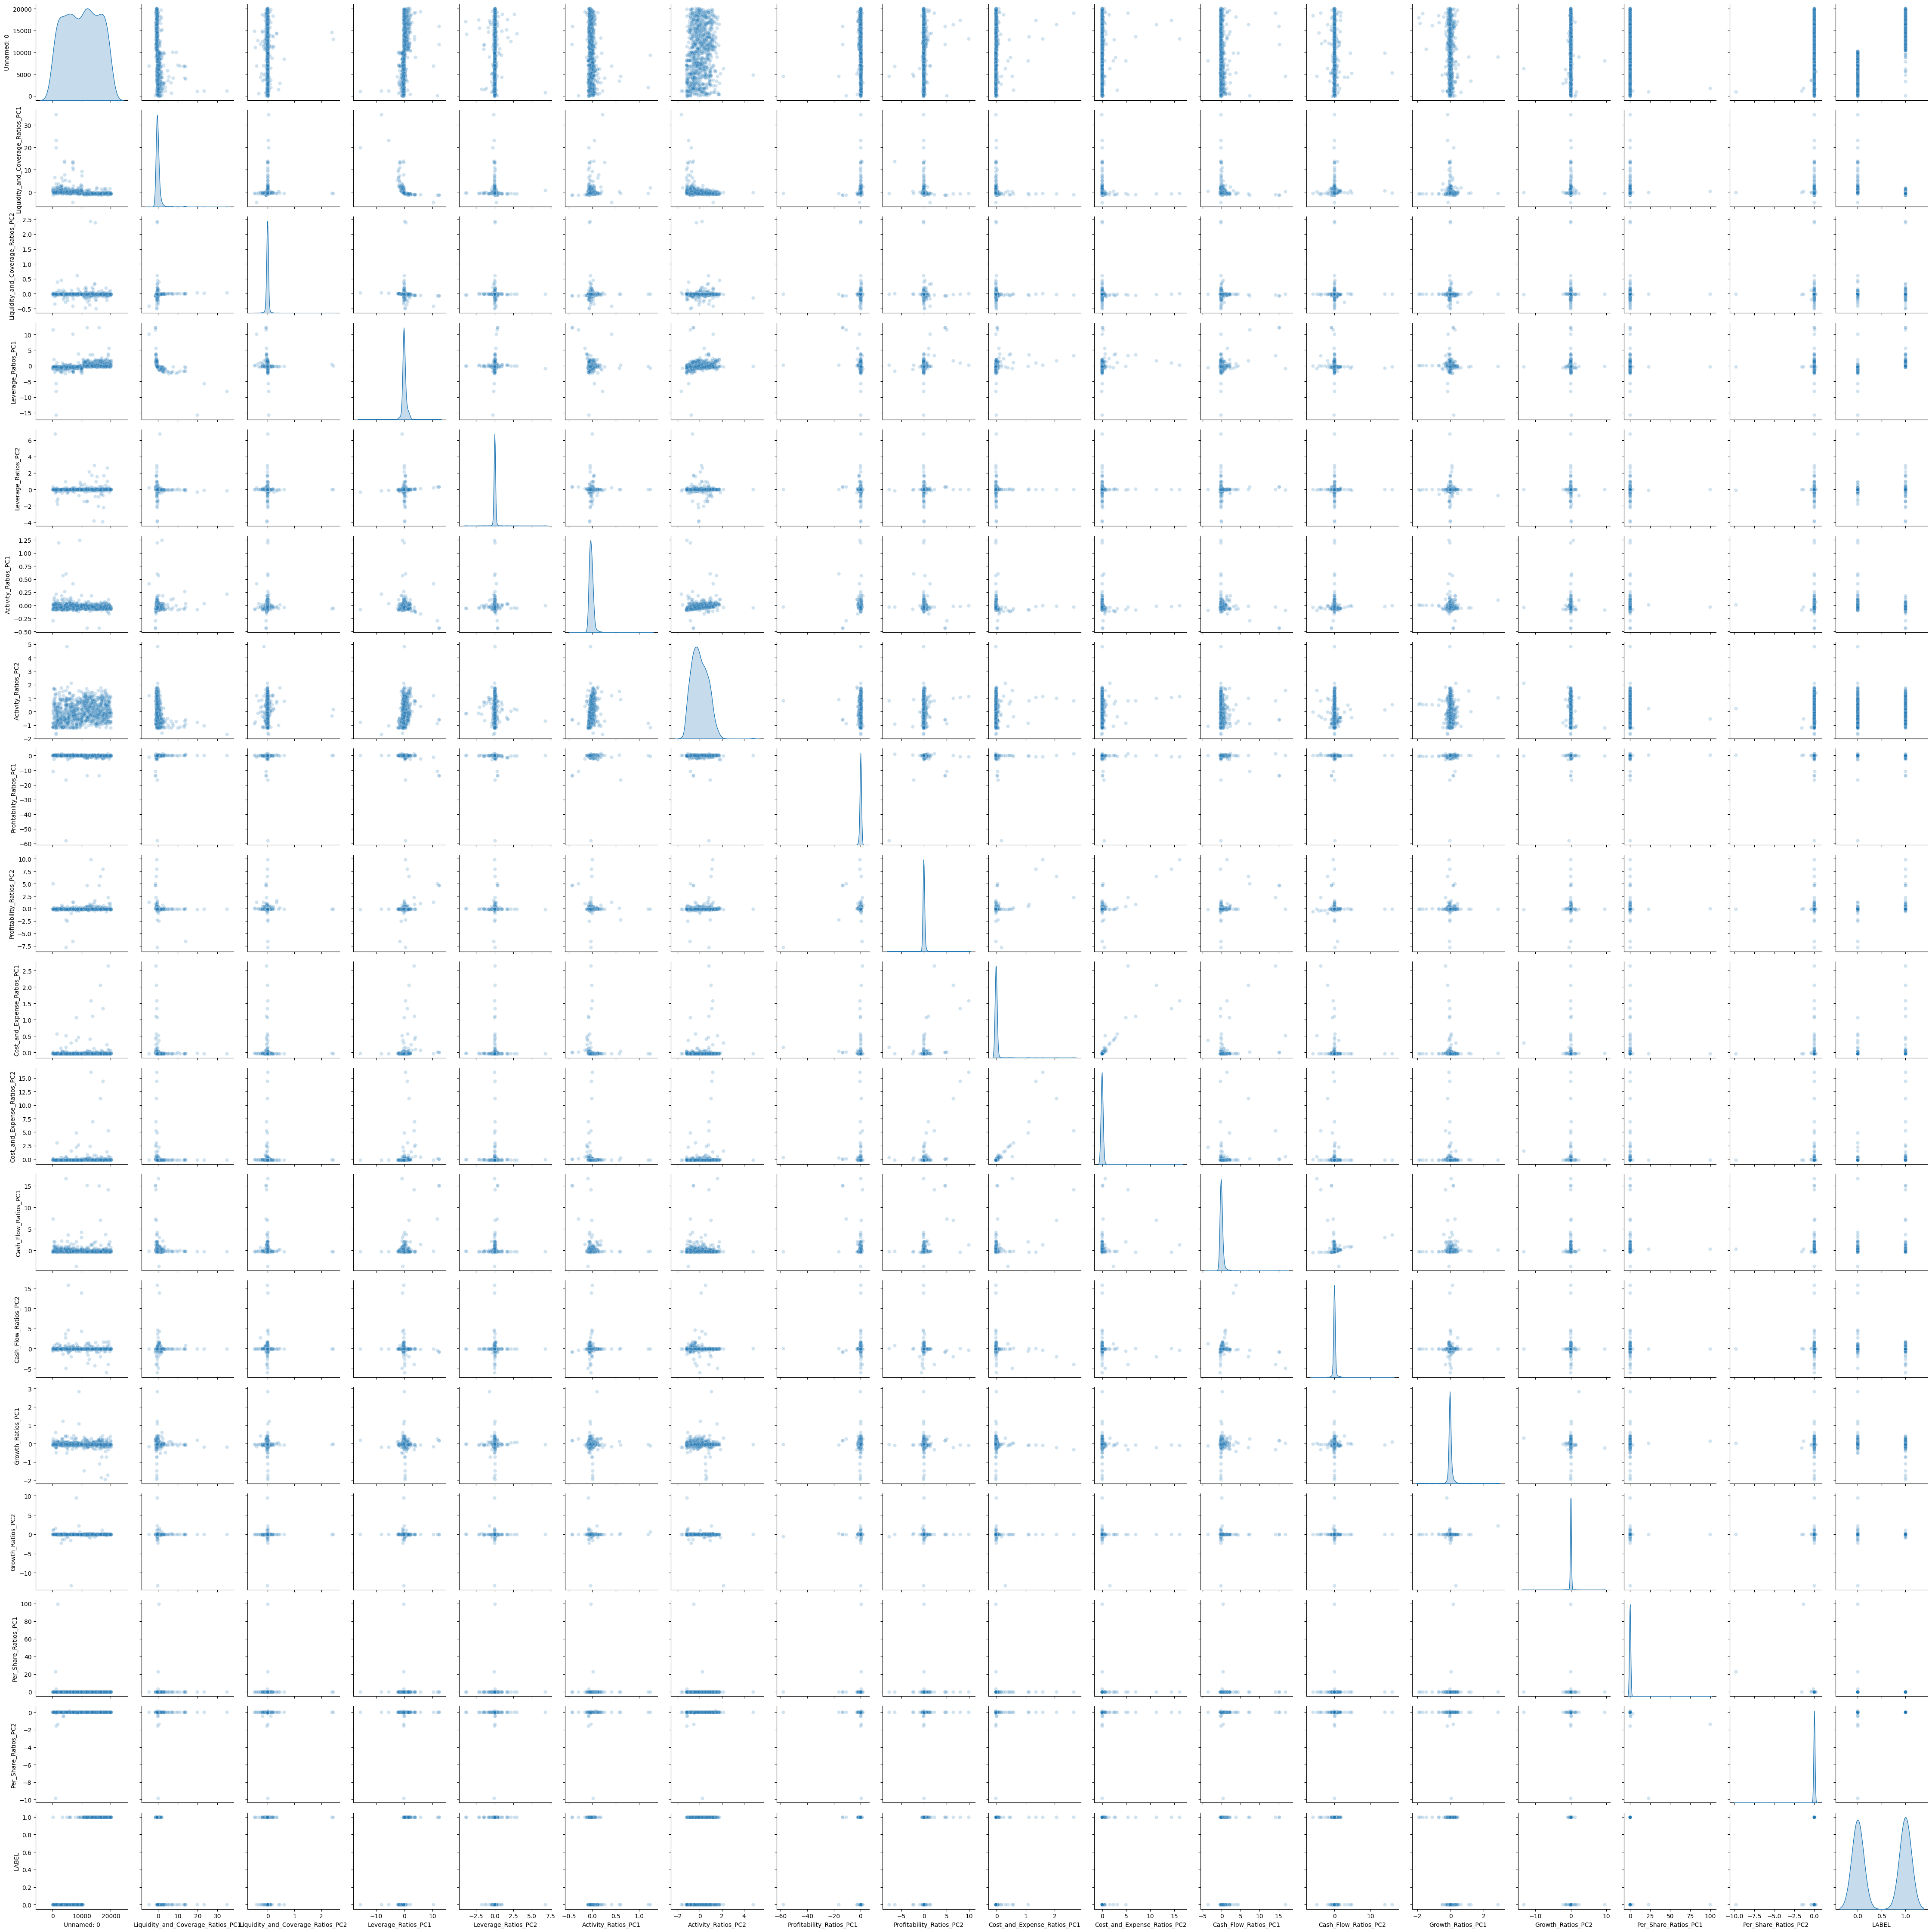


Approximate Noise-to-Signal Ratio: 0.0080
 
 
 
Analysis of Df_AE:
Basic Statistics:
         Unnamed: 0  Liquidity_and_Coverage_Ratios_PC1  \
count  20125.000000                       2.012500e+04   
mean   10062.000000                      -4.519228e-17   
std     5809.731419                       1.787012e+00   
min        0.000000                      -7.841332e+00   
25%     5031.000000                      -6.208395e-01   
50%    10062.000000                      -3.530034e-01   
75%    15093.000000                       1.324803e-01   
max    20124.000000                       1.193724e+02   

       Liquidity_and_Coverage_Ratios_PC2  Leverage_Ratios_PC1  \
count                       2.012500e+04         2.012500e+04   
mean                       -1.059194e-17        -1.129807e-17   
std                         1.000021e+00         1.140464e+00   
min                        -7.799666e+00        -2.633598e+01   
25%                        -1.485416e-02        -3.732928e-01   
5

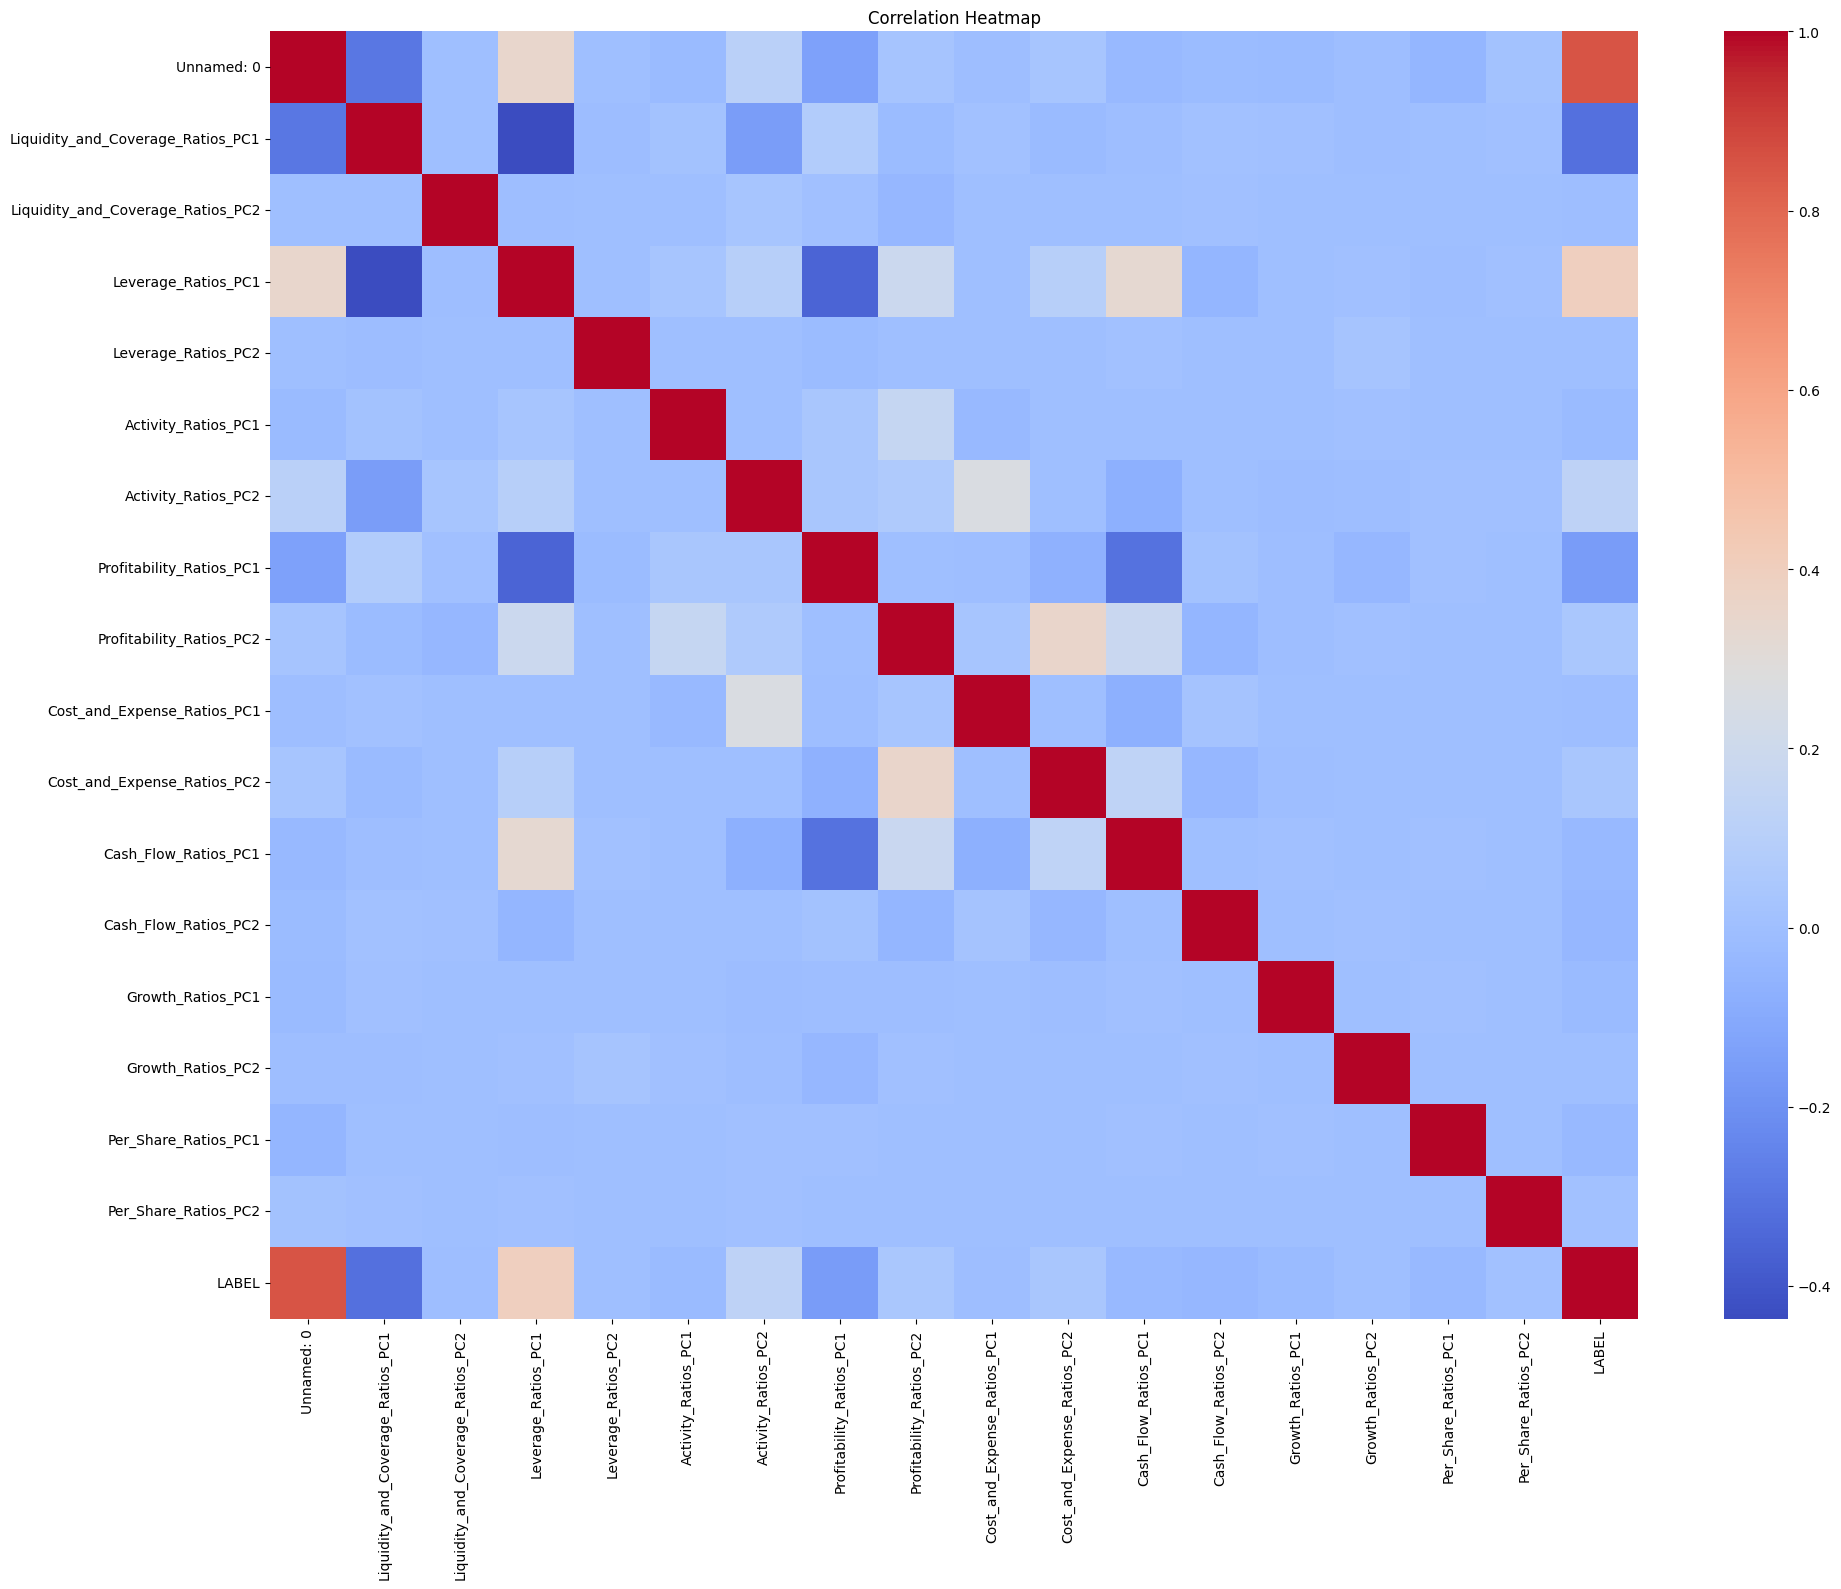


Highly correlated feature pairs:
Unnamed: 0 - LABEL: 0.85

Variance Inflation Factors:
                              feature       VIF
0                               const  5.201196
18                              LABEL  3.911864
1                          Unnamed: 0  3.709760
4                 Leverage_Ratios_PC1  1.754381
2   Liquidity_and_Coverage_Ratios_PC1  1.327540
12               Cash_Flow_Ratios_PC1  1.280179
9            Profitability_Ratios_PC2  1.246659
8            Profitability_Ratios_PC1  1.235338
11        Cost_and_Expense_Ratios_PC2  1.154909
7                 Activity_Ratios_PC2  1.127904
10        Cost_and_Expense_Ratios_PC1  1.087557
6                 Activity_Ratios_PC1  1.036868
13               Cash_Flow_Ratios_PC2  1.007364
3   Liquidity_and_Coverage_Ratios_PC2  1.003643
15                  Growth_Ratios_PC2  1.002928
16               Per_Share_Ratios_PC1  1.002398
5                 Leverage_Ratios_PC2  1.001355
14                  Growth_Ratios_PC1  1.000891


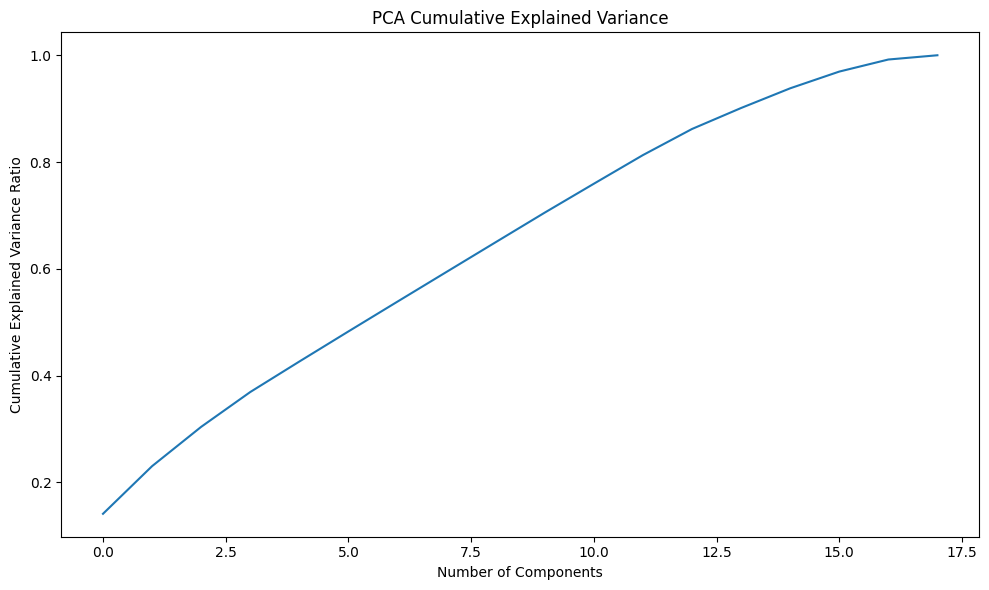

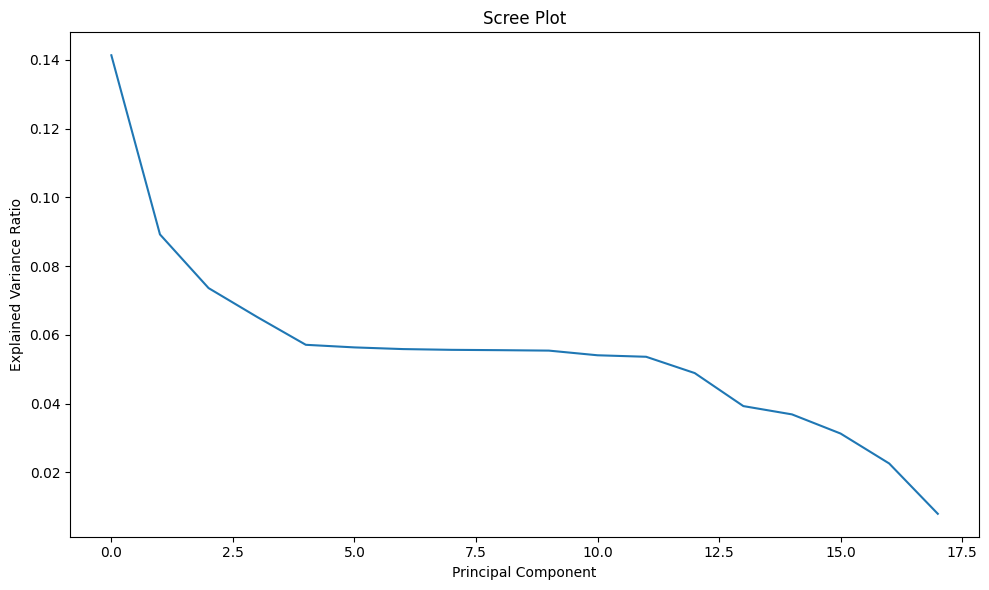


Number of potential outliers (Isolation Forest): 2013
Number of potential outliers (Elliptic Envelope): 2013
Number of potential outliers (Z-score > 3): 1461

Skewness of features:
Unnamed: 0                             0.000000
Liquidity_and_Coverage_Ratios_PC1     20.965352
Liquidity_and_Coverage_Ratios_PC2    126.707336
Leverage_Ratios_PC1                    6.765075
Leverage_Ratios_PC2                   45.339471
Activity_Ratios_PC1                   89.479799
Activity_Ratios_PC2                   32.946907
Profitability_Ratios_PC1               0.184323
Profitability_Ratios_PC2              62.990896
Cost_and_Expense_Ratios_PC1          136.238073
Cost_and_Expense_Ratios_PC2           23.286295
Cash_Flow_Ratios_PC1                  13.745306
Cash_Flow_Ratios_PC2                  33.851644
Growth_Ratios_PC1                     73.846641
Growth_Ratios_PC2                    115.774302
Per_Share_Ratios_PC1                  45.792300
Per_Share_Ratios_PC2                  -9.983996
LA

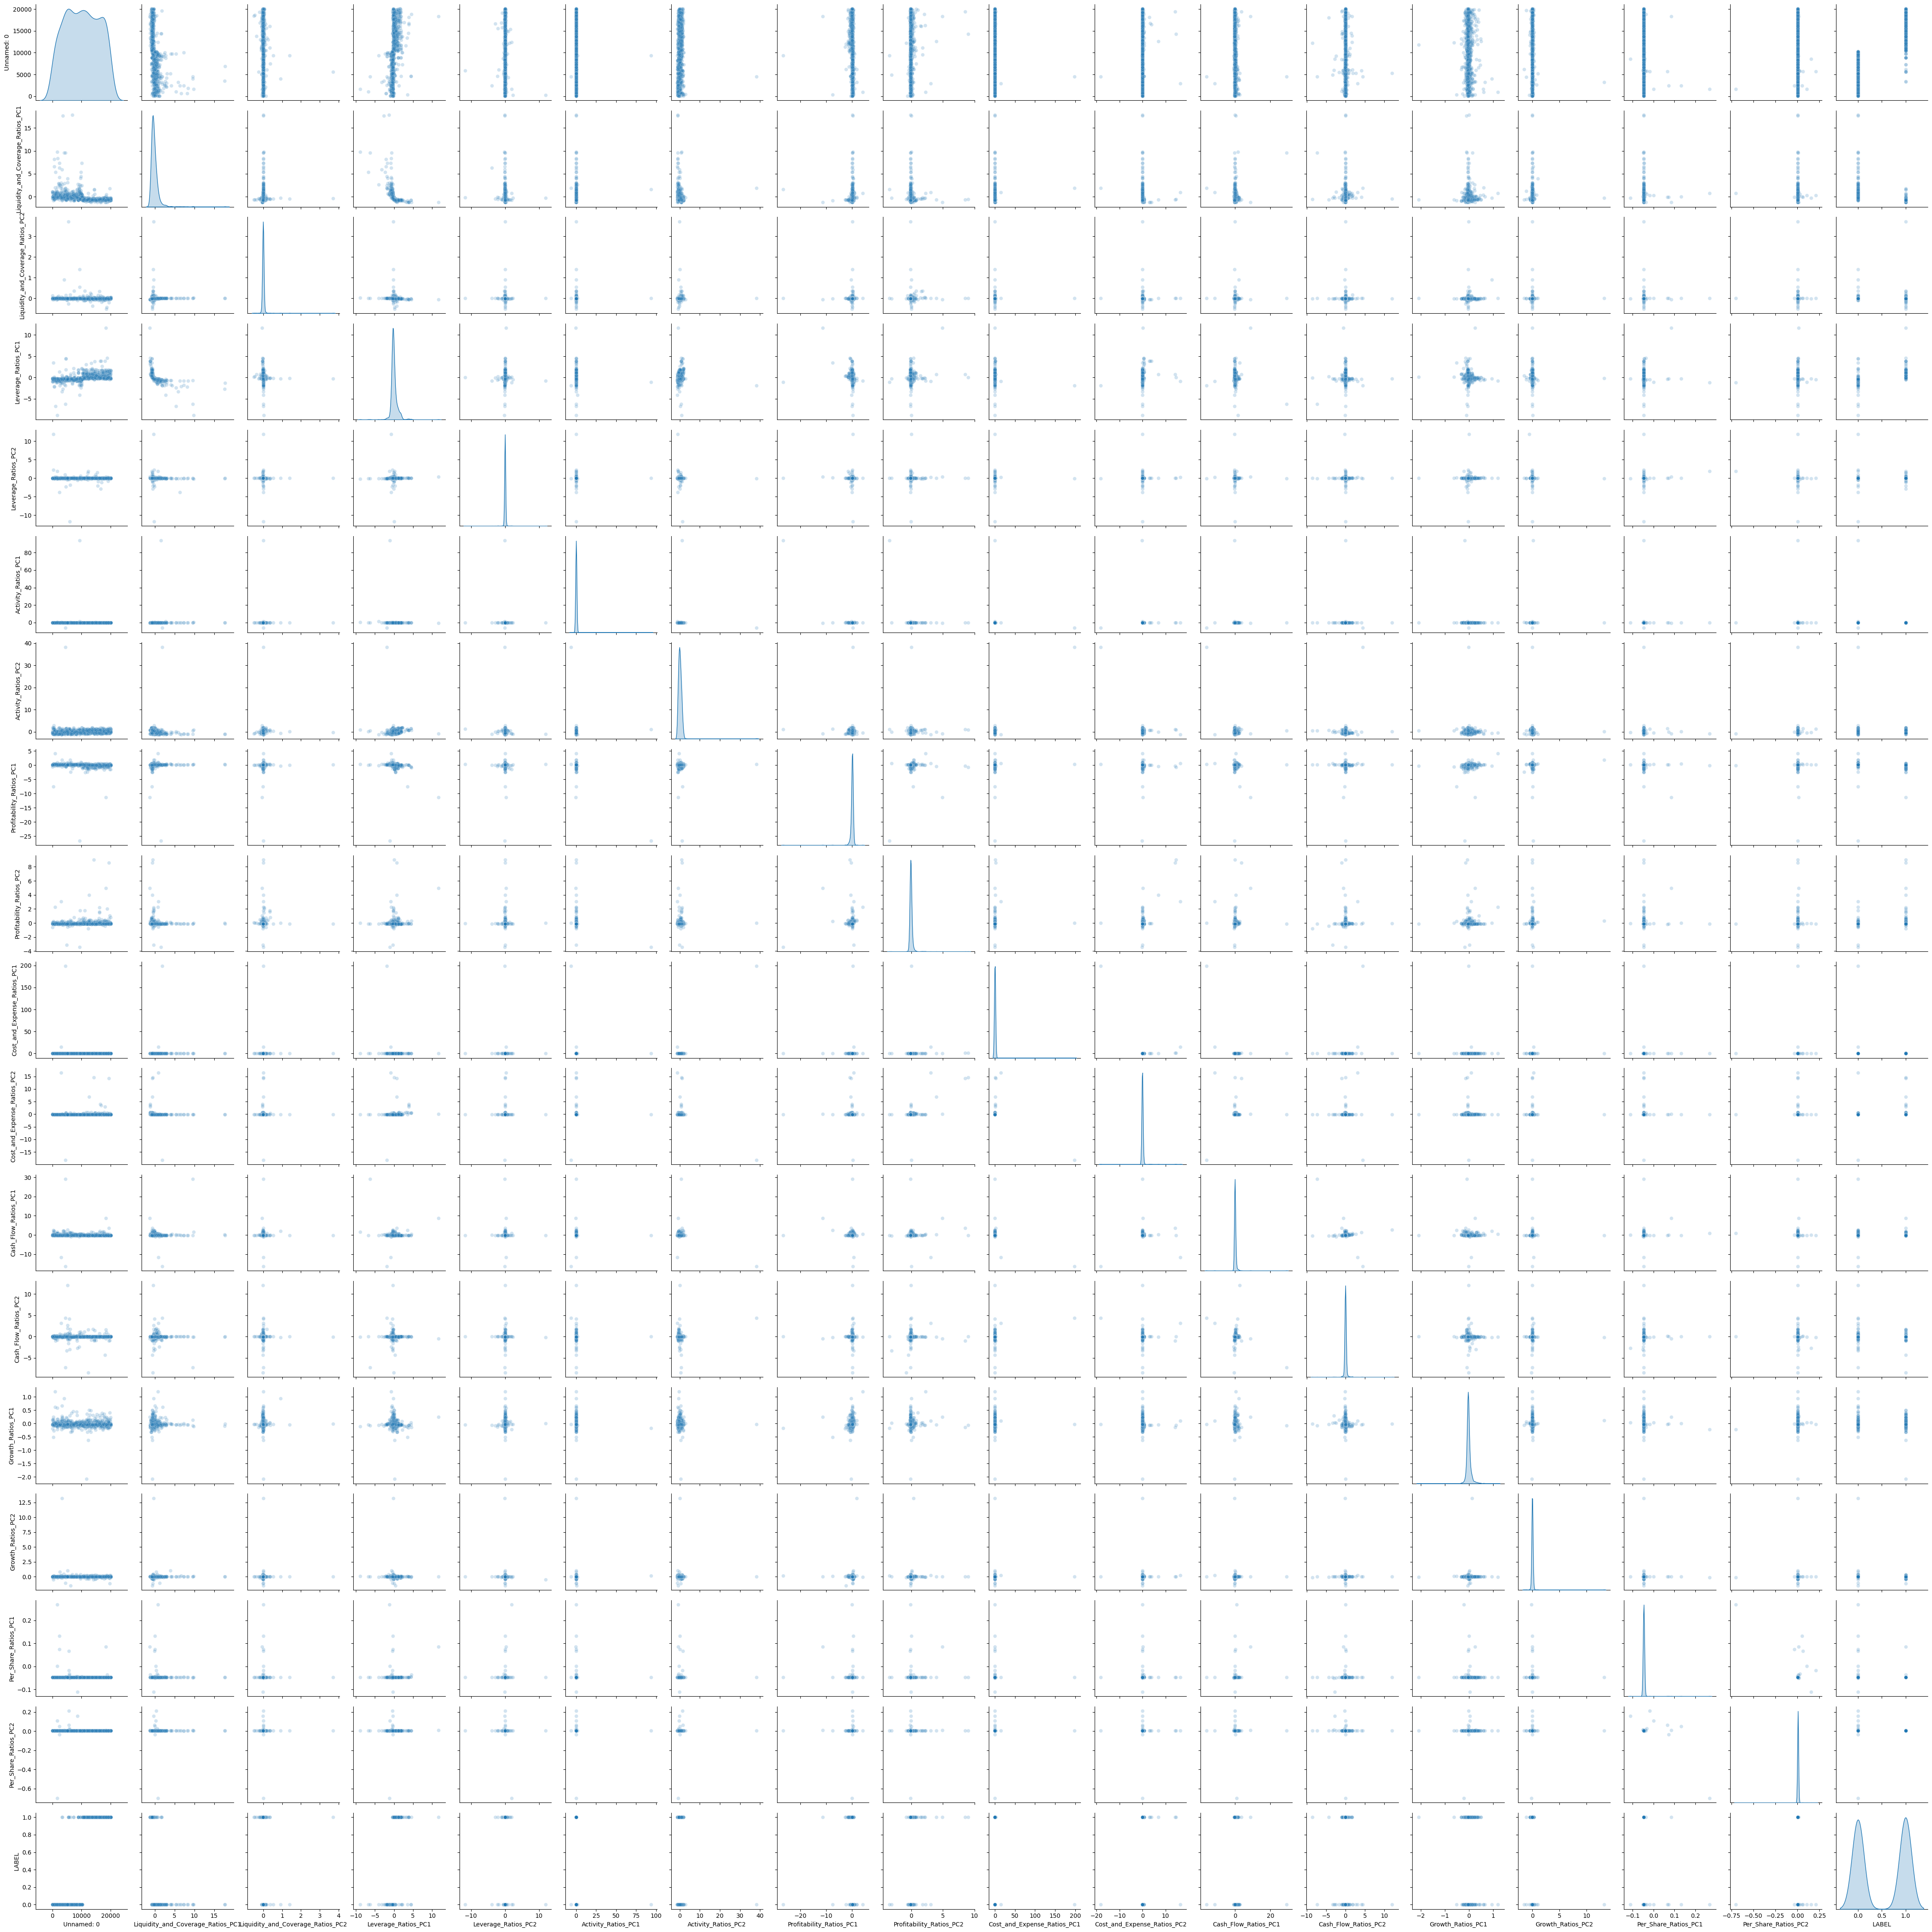


Approximate Noise-to-Signal Ratio: 0.0080


In [4]:
df_mice = pd.read_excel("C:\\Users\\dev\\Desktop\\Msc thesis Prior RS\\ML training\\df_mice_labeled_after_PCA.xlsx")
df_AE = pd.read_excel("C:\\Users\\dev\\Desktop\\Msc thesis Prior RS\\ML training\\df_autoencoder_labeled_after_PCA.xlsx") 


# Run the comprehensive analysis
print("Analysis of Df_mice:")
comprehensive_analysis(df_mice)
print(" ")
print(" ")
print(" ")

print("Analysis of Df_AE:")
comprehensive_analysis(df_AE)

Things to do:

- keep the correlation, VIF for multicollinearity
- include everything except pairplot for noise

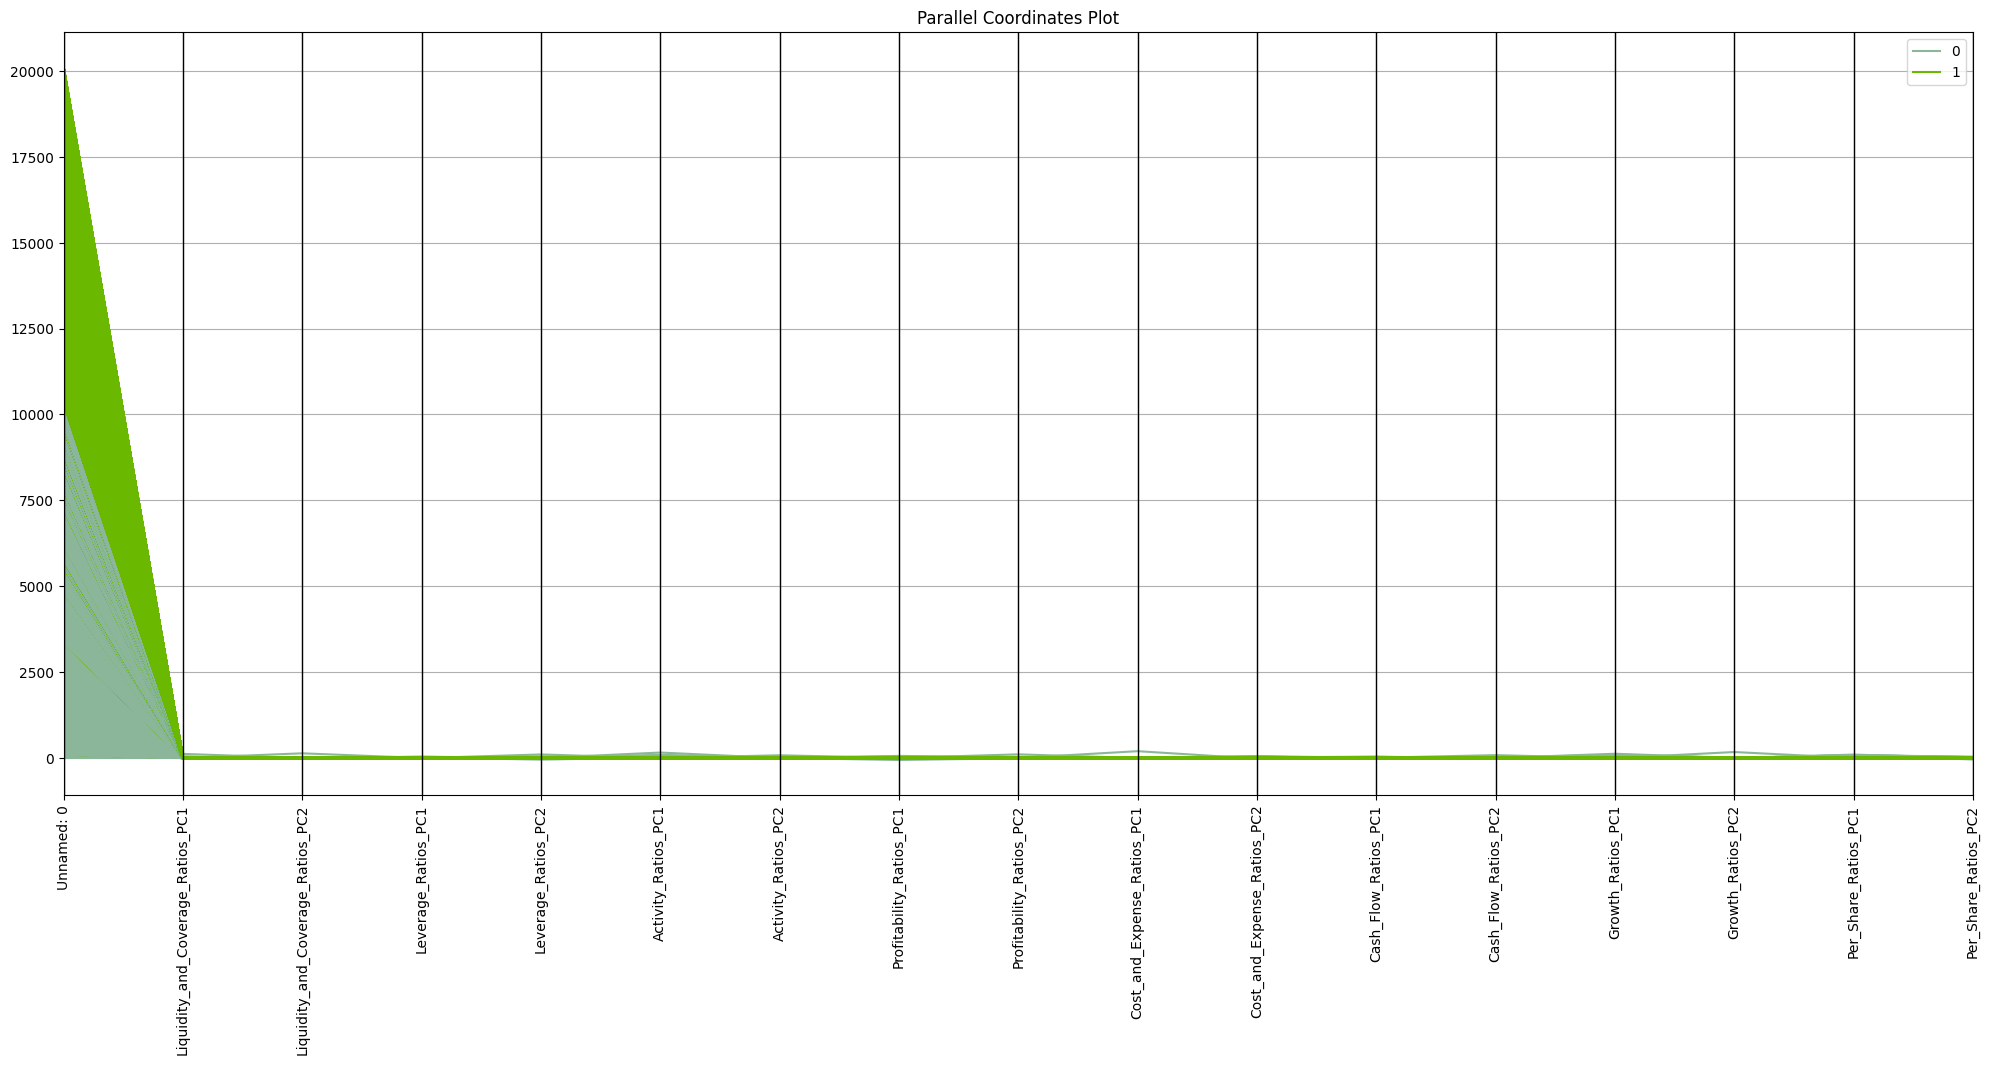

In [8]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
parallel_coordinates(df_mice, "LABEL")
plt.title('Parallel Coordinates Plot')

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Adjust the bottom margin to prevent label cutoff
plt.tight_layout()

# Optionally, you can add more space at the bottom
plt.subplots_adjust(bottom=0.2)

plt.show()

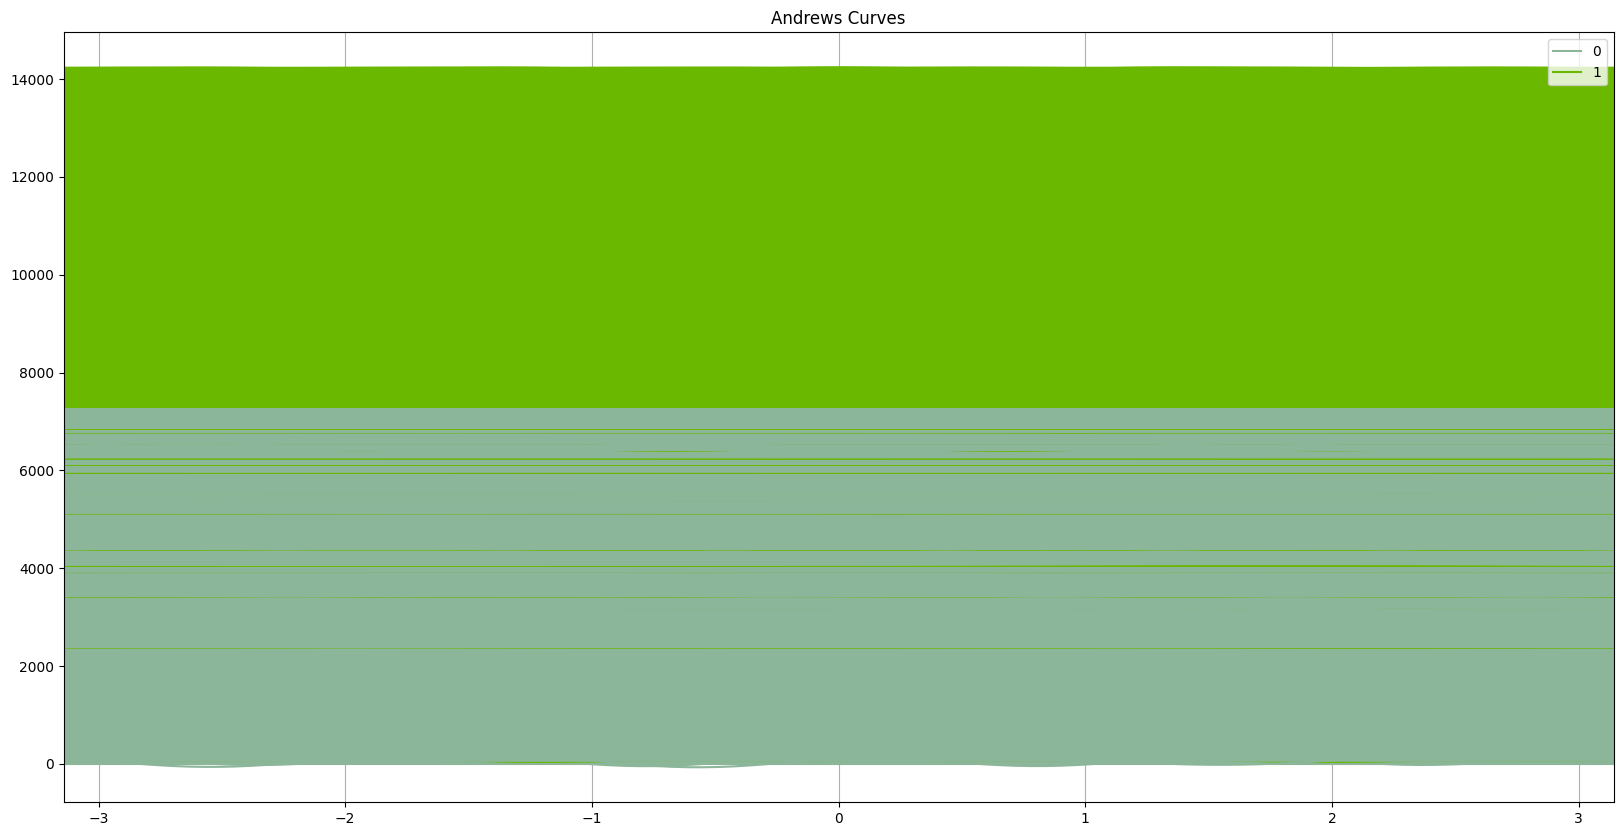

In [7]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(20, 10))
andrews_curves(df_mice, "LABEL")
plt.title('Andrews Curves')
plt.show()